In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Importing the data
df_credit = pd.read_csv("data/german_credit_data.csv", index_col=0)

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
# Age (numeric)
# Sex (text: male, female)
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
# Housing (text: own, rent, or free)
# Saving accounts (text - little, moderate, quite rich, rich)
# Checking account (numeric, in DM - Deutsch Mark)
# Credit amount (numeric, in DM)
# Duration (numeric, in month)
# Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
# Risk (Value target - Good or Bad Risk)

In [5]:
df_credit.shape

(1000, 10)

In [6]:

df_credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
df_credit['Job'] = df_credit['Job'].replace([0,1,2,3],['unskilled/non-res','unskilled/res','skilled','highlyskilled'])

In [14]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled/res,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [8]:
df_credit.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [20]:
for i in ['Job','Housing','Saving accounts','Checking account','Purpose','Risk']:
    print(df_credit[i].value_counts())

Job
skilled              630
unskilled/res        200
highlyskilled        148
unskilled/non-res     22
Name: count, dtype: int64
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64
Risk
good    700
bad     300
Name: count, dtype: int64


In [21]:
df_credit.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [26]:
num_features=[feature for feature in df_credit.columns if df_credit[feature].dtype!='O']
cat_features=[feature for feature in df_credit.columns if df_credit[feature].dtype=='O']
print('numerical features count: {}: {}'.format(len(num_features), num_features))
print('catigorical features count: {}: {}'.format(len(cat_features), cat_features))

numerical features count: 3: ['Age', 'Credit amount', 'Duration']
catigorical features count: 7: ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


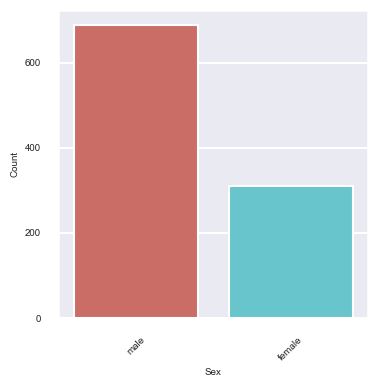

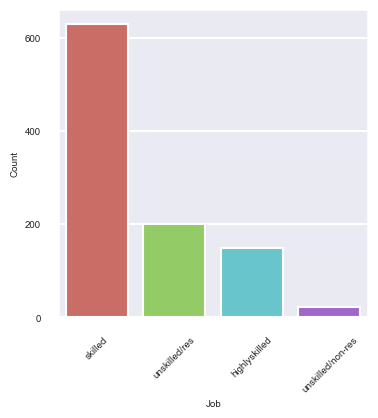

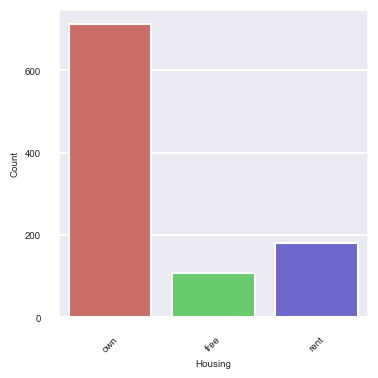

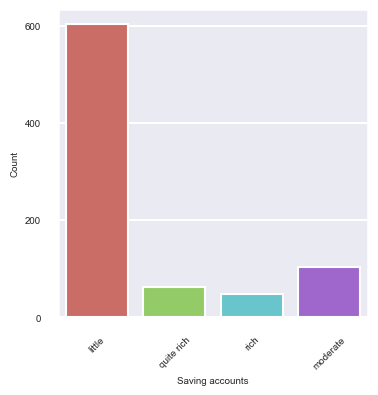

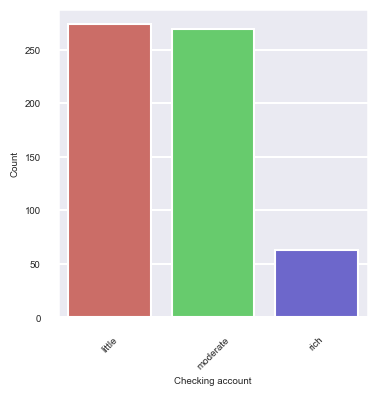

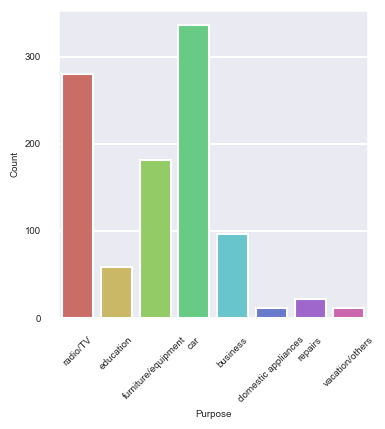

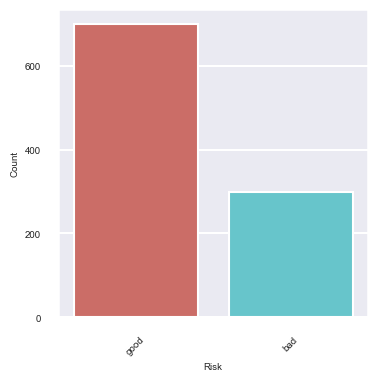

In [30]:
for i in cat_features: 
    plt.figure(figsize=(4,4))
    sns.countplot(data=df_credit, x = i, palette="hls")
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.xlabel(i, fontsize=7)
    plt.ylabel('Count', fontsize=7)
    plt.show()

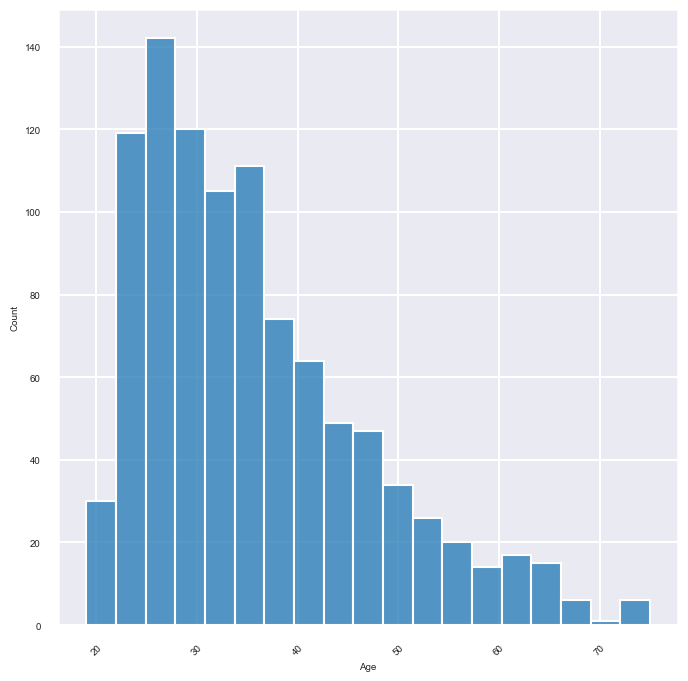

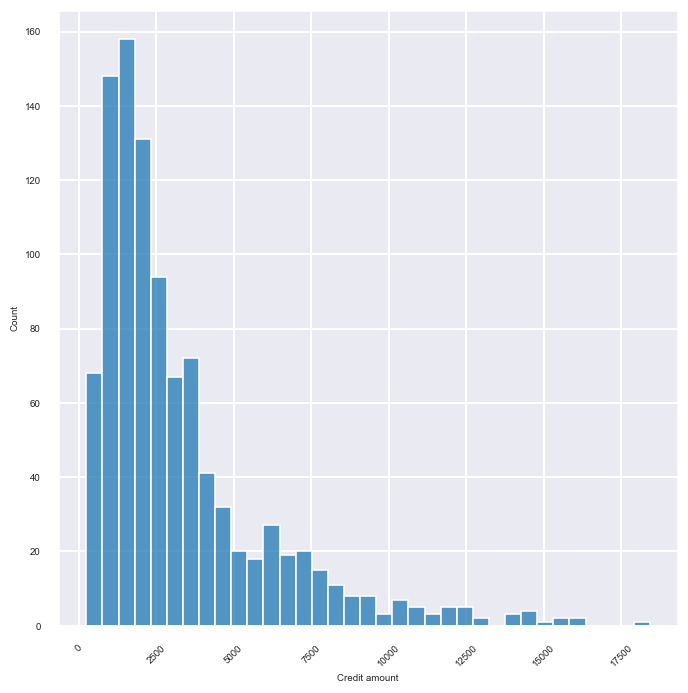

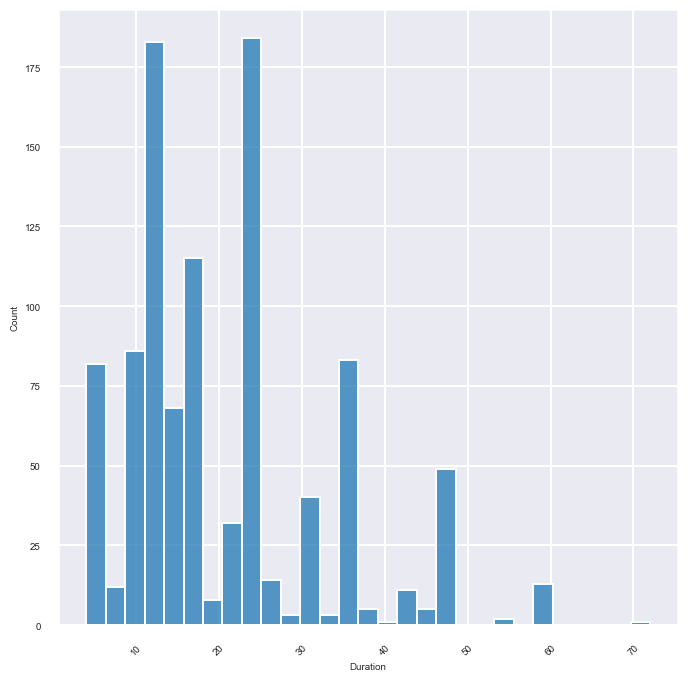

In [31]:
for i in num_features: 
    plt.figure(figsize = (8,8))
    sns.histplot(data = df_credit, x = i, palette="hls")
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.xlabel(i, fontsize=7)
    plt.ylabel('Count', fontsize=7)
    plt.show()

### AGE

In [32]:
df_good = df_credit[df_credit['Risk'] == 'good']
df_bad = df_credit[df_credit['Risk'] == 'bad']

In [33]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Midage', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit['Age'], interval, labels = cats)

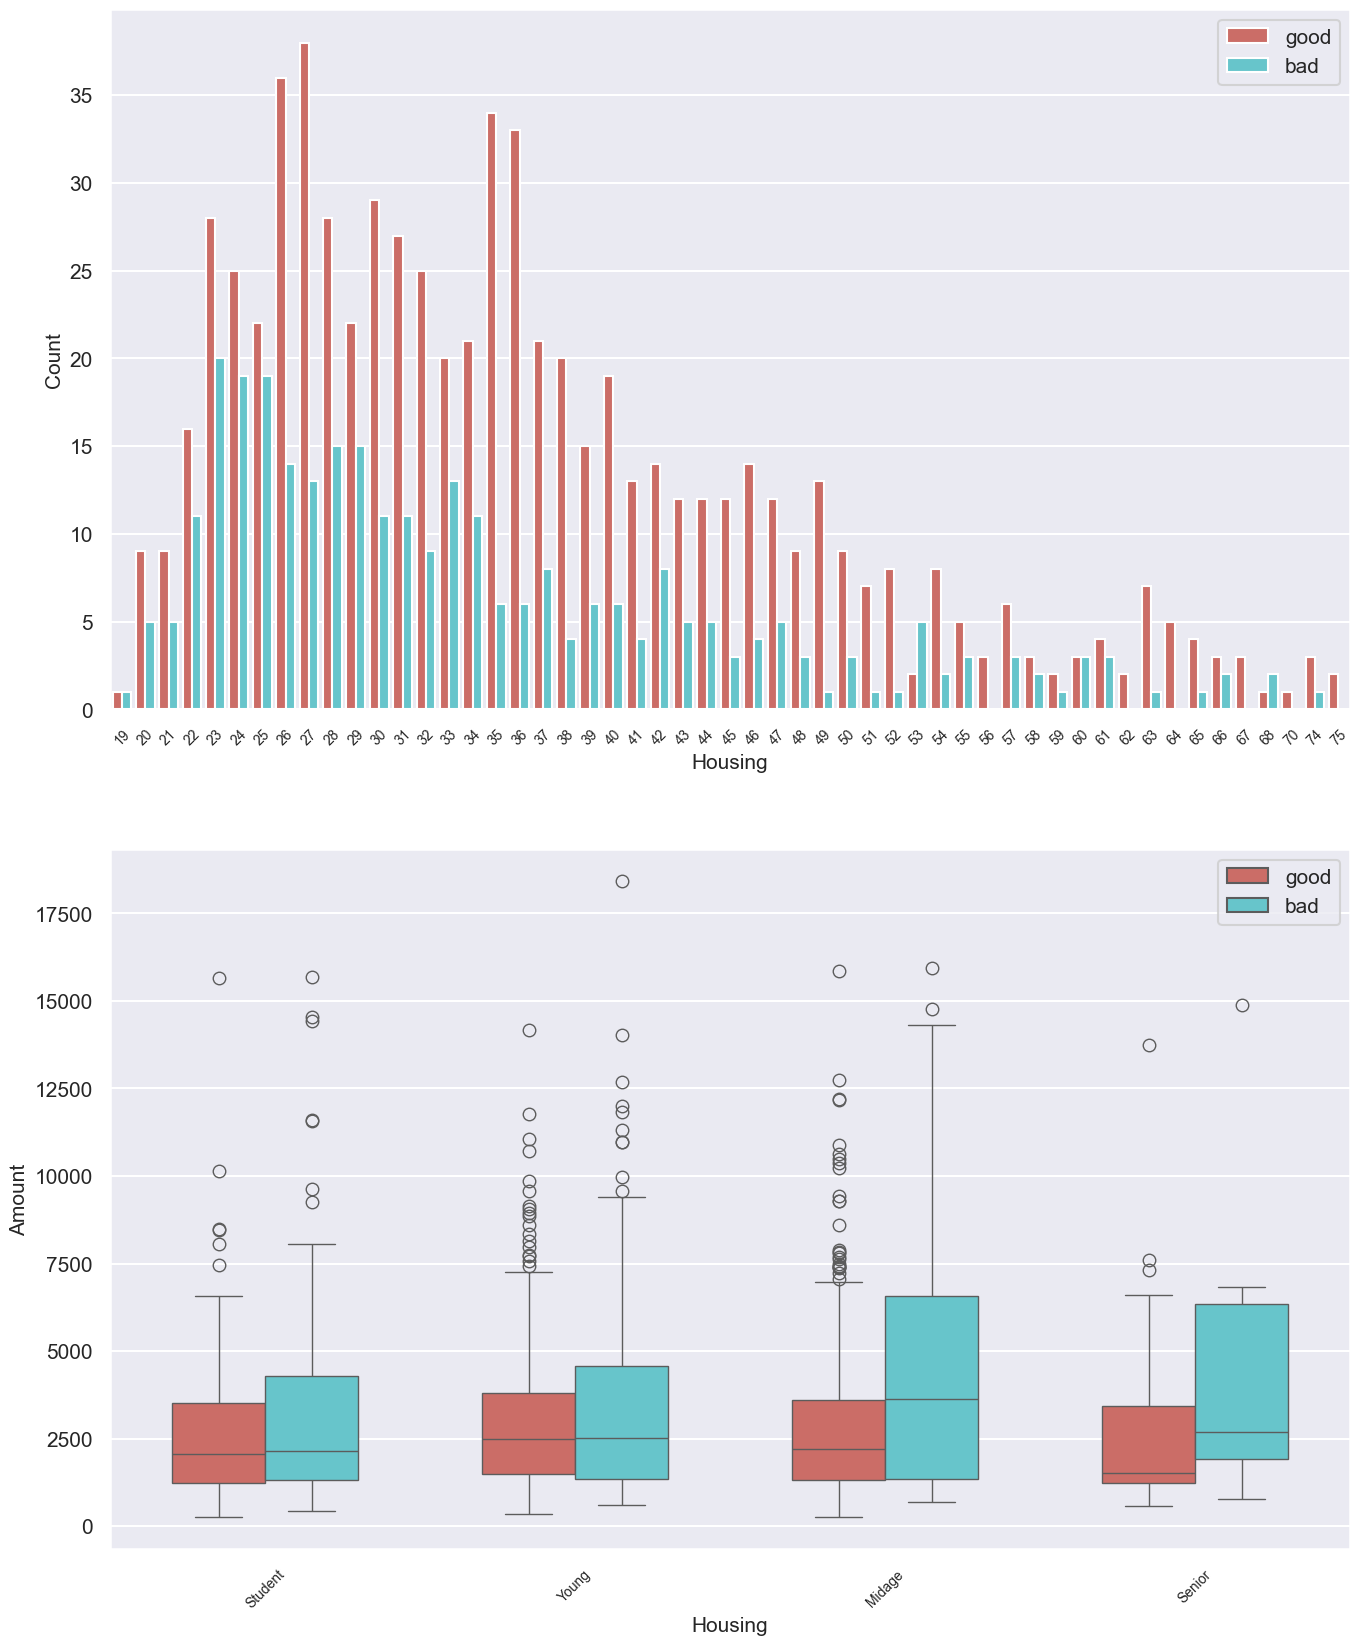

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(16,20))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Age', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Age_cat', y = 'Credit amount', hue = 'Risk', width=0.6, palette="hls")

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Housing', fontsize= 15)
ax2.set_xlabel('Housing', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=10,rotation=45)
ax2.tick_params(axis = 'x',labelsize=10,rotation=45)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()

# plt.figure(figsize = (16,8))
# sns.countplot(data = df_credit, x = 'Age', hue = 'Risk', palette="hls")
# plt.xticks(rotation=45, fontsize=10)
# plt.yticks(fontsize=13)
# plt.xlabel('Age', fontsize=13)
# plt.ylabel('Count', fontsize=13)
# plt.show()

# plt.figure(figsize = (16,8))
# sns.boxplot(data = df_credit, x = 'Age_cat', y = 'Credit amount', hue = 'Risk', width=0.6, palette="hls")
# plt.xticks(rotation=45, fontsize=10)
# plt.yticks(fontsize=13)
# plt.xlabel('Age', fontsize=13)
# plt.ylabel('Credit Amount', fontsize=13)
# plt.show()

### HOUSING

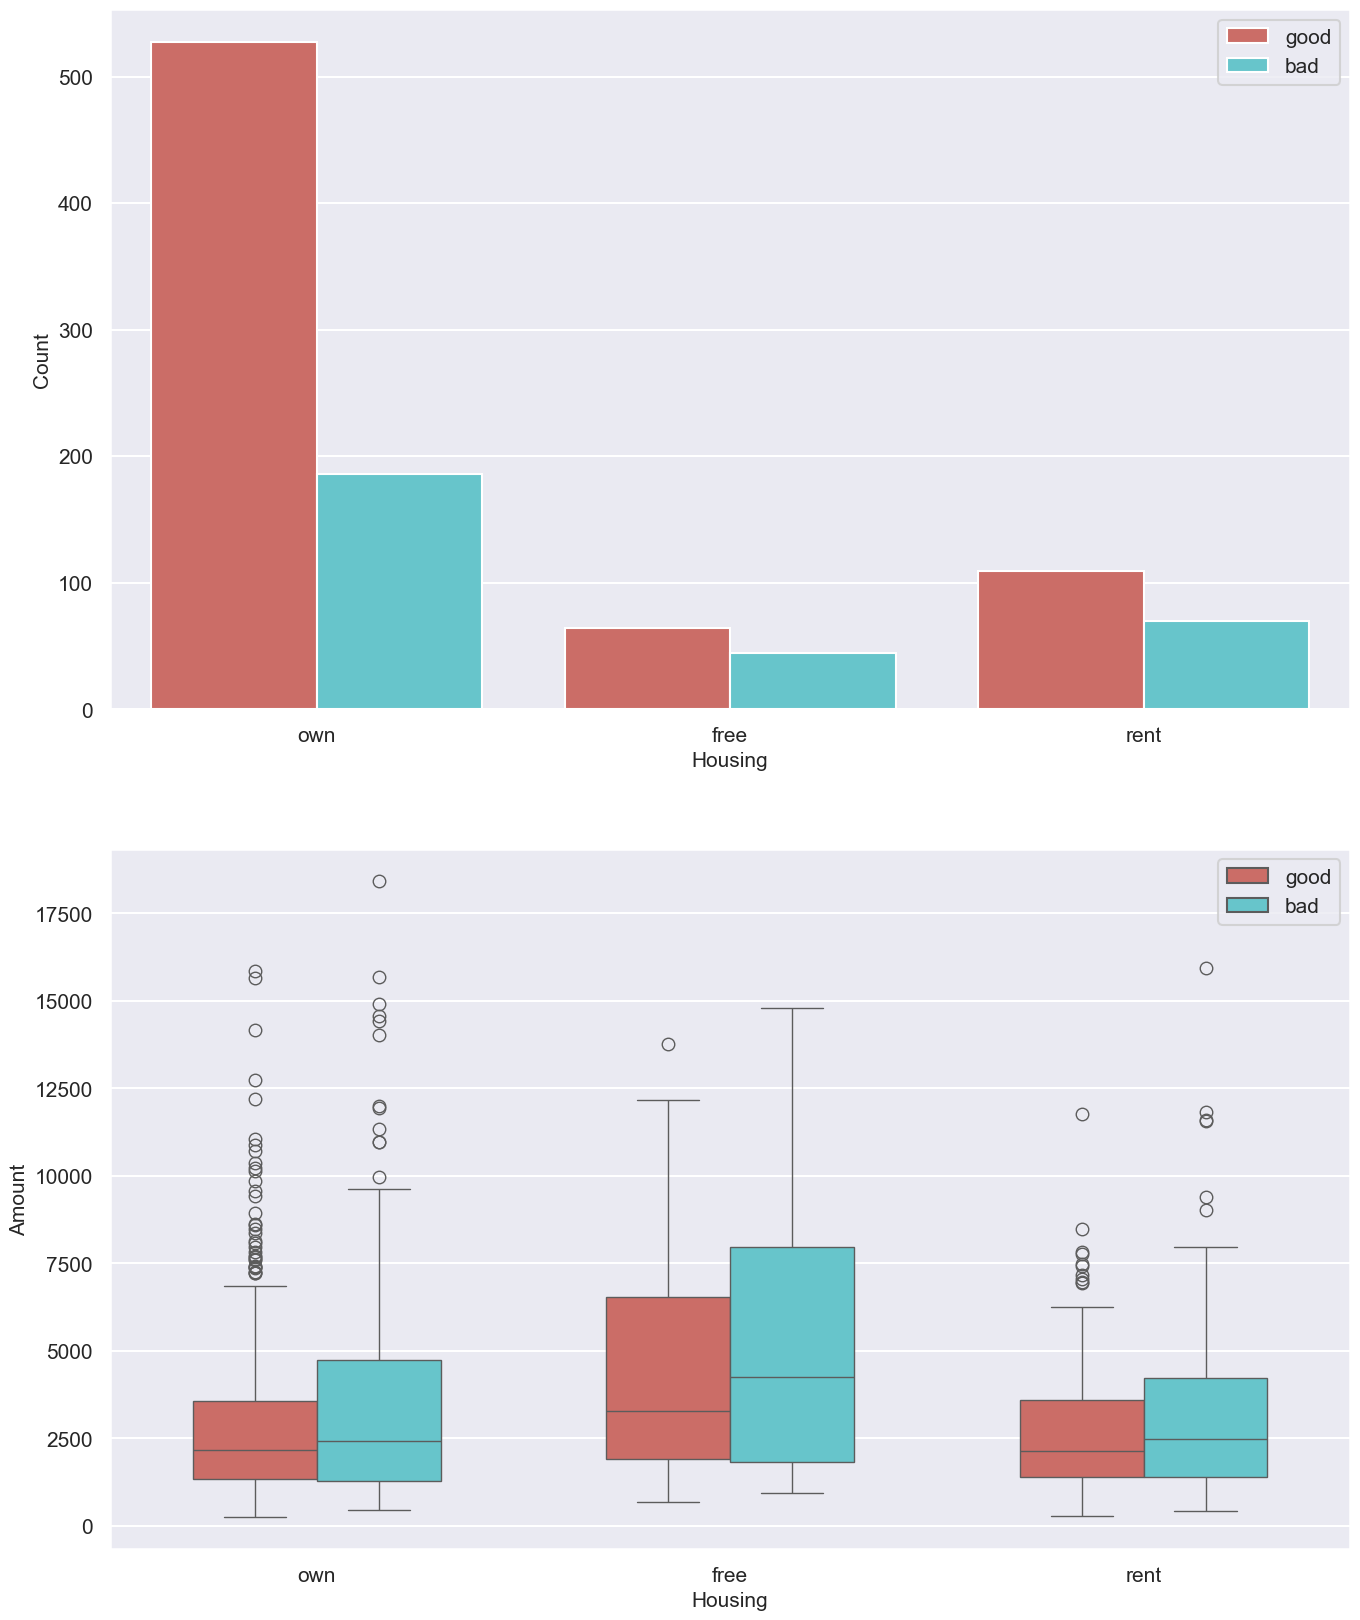

In [44]:
fig, axes = plt.subplots(2,1, figsize=(16,20))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Housing', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Housing', y = 'Credit amount', hue = 'Risk', width=0.6, palette="hls")

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Housing', fontsize= 15)
ax2.set_xlabel('Housing', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()

### SEX

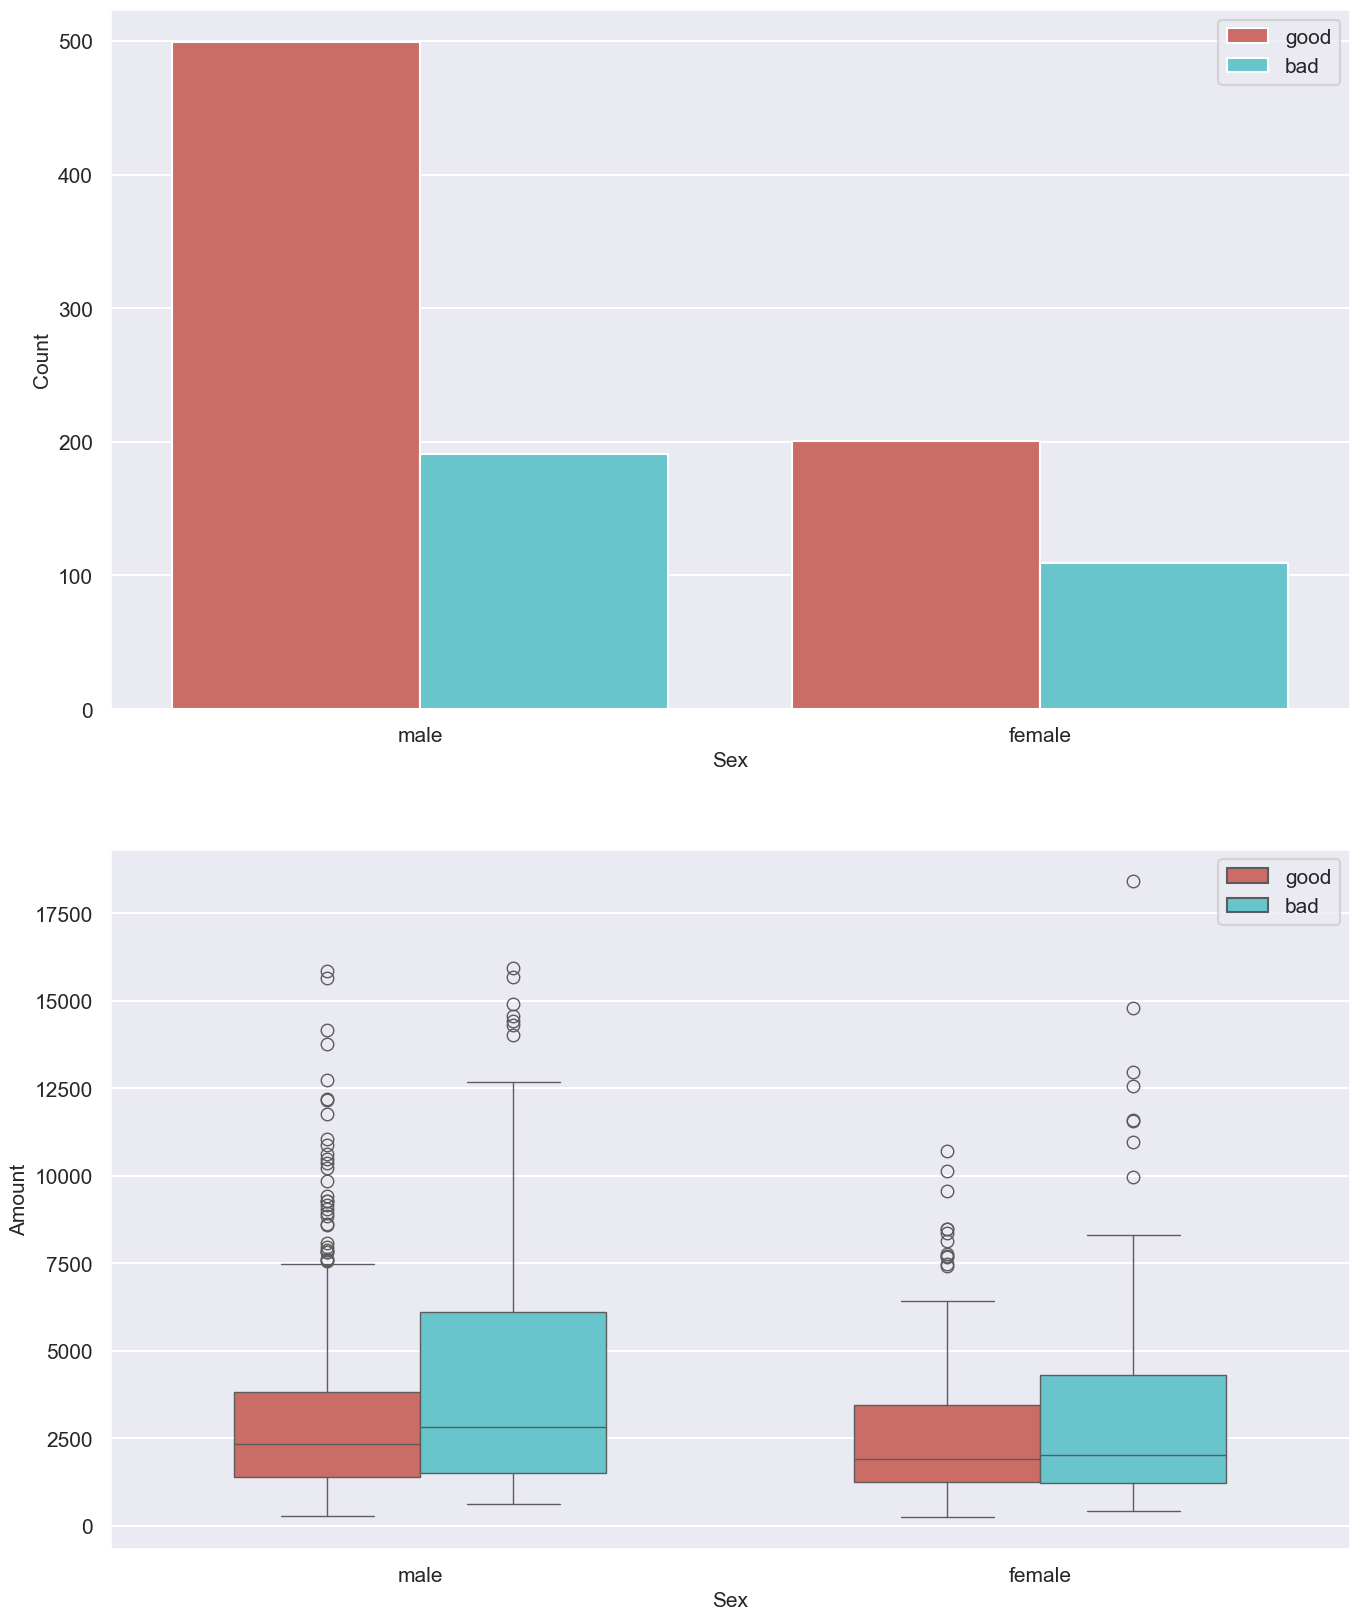

In [45]:
fig, axes = plt.subplots(2,1, figsize=(16,20))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Sex', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Sex', y = 'Credit amount', hue = 'Risk', width=0.6, palette="hls")

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Sex', fontsize= 15)
ax2.set_xlabel('Sex', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()

### JOB

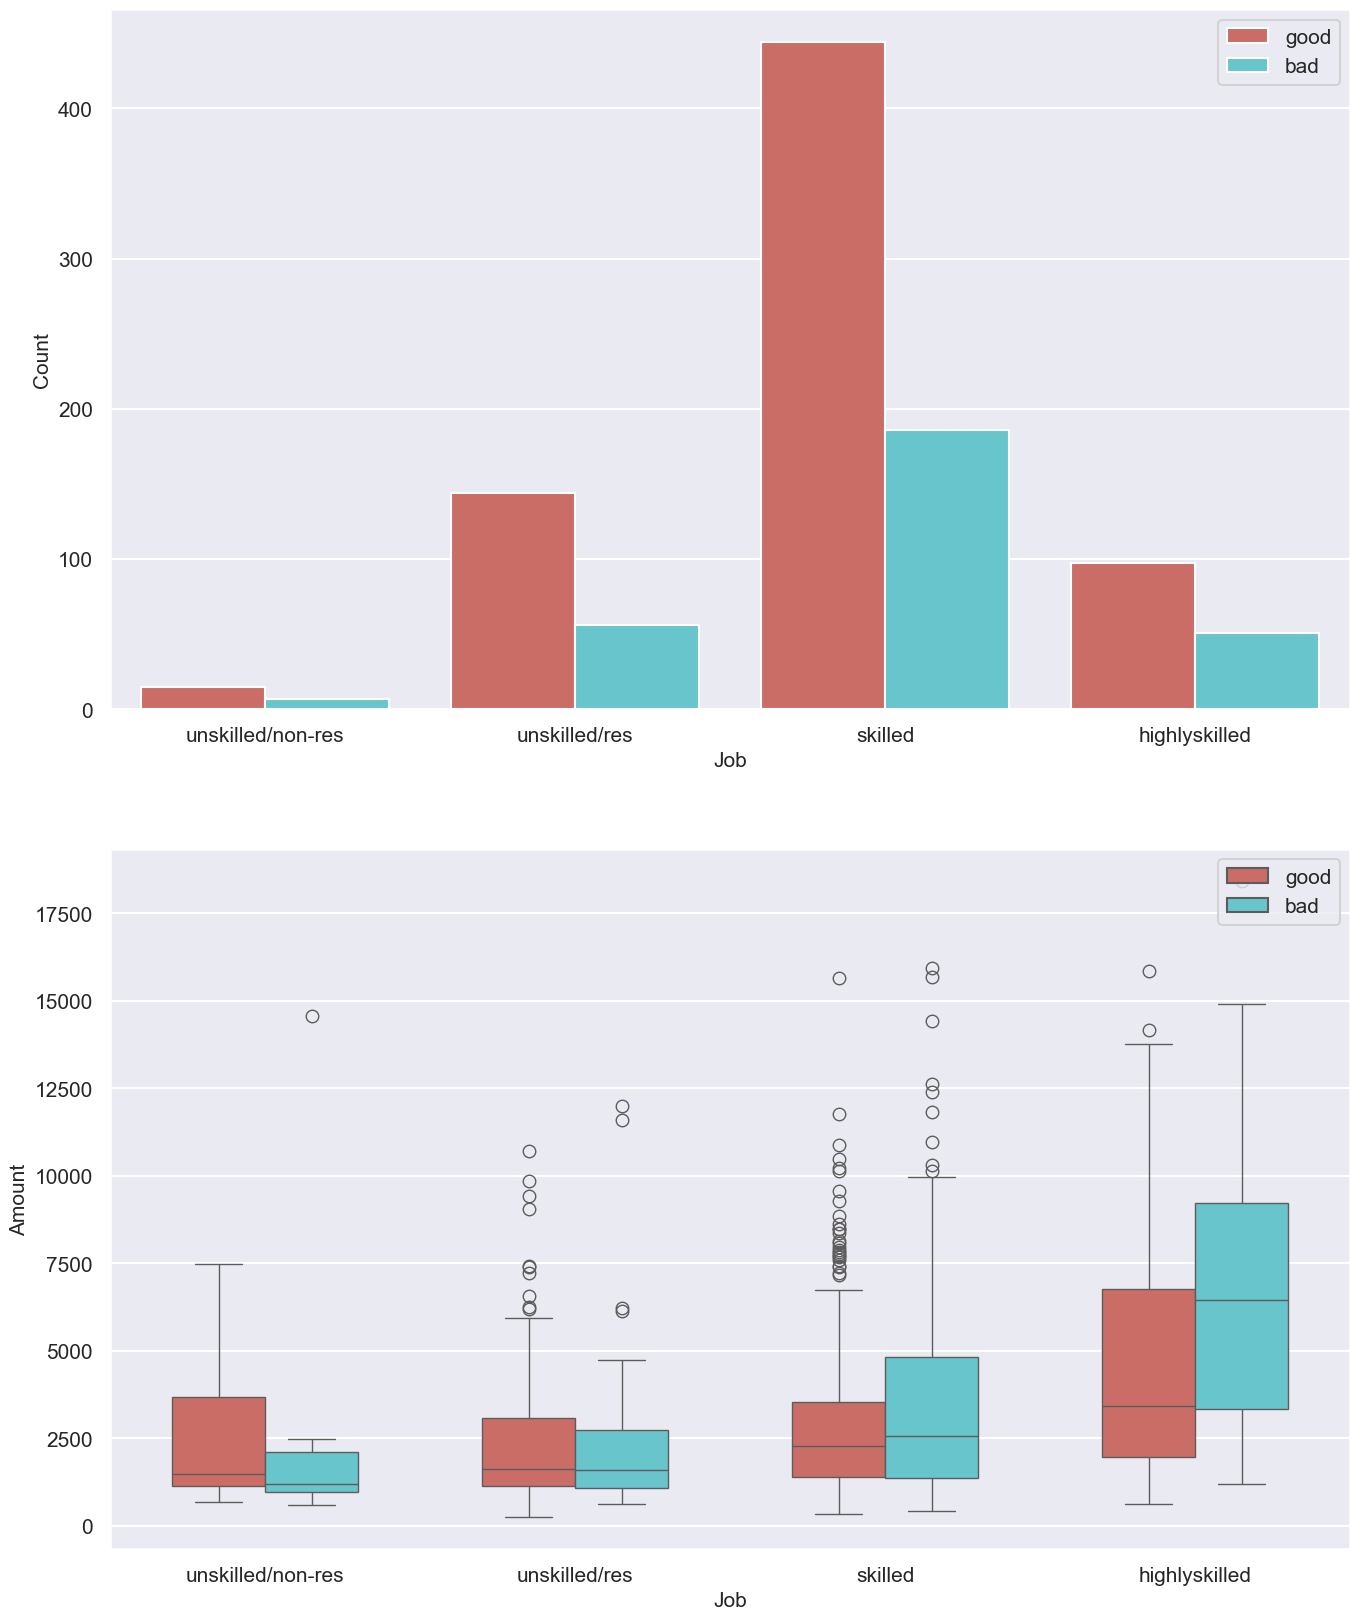

In [46]:
fig, axes = plt.subplots(2,1, figsize=(16,20))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Job', hue = 'Risk', palette="hls", 
                    order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'])
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Job', y = 'Credit amount', hue = 'Risk', width=0.6, 
                  palette="hls", order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'])

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Job', fontsize= 15)
ax2.set_xlabel('Job', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()


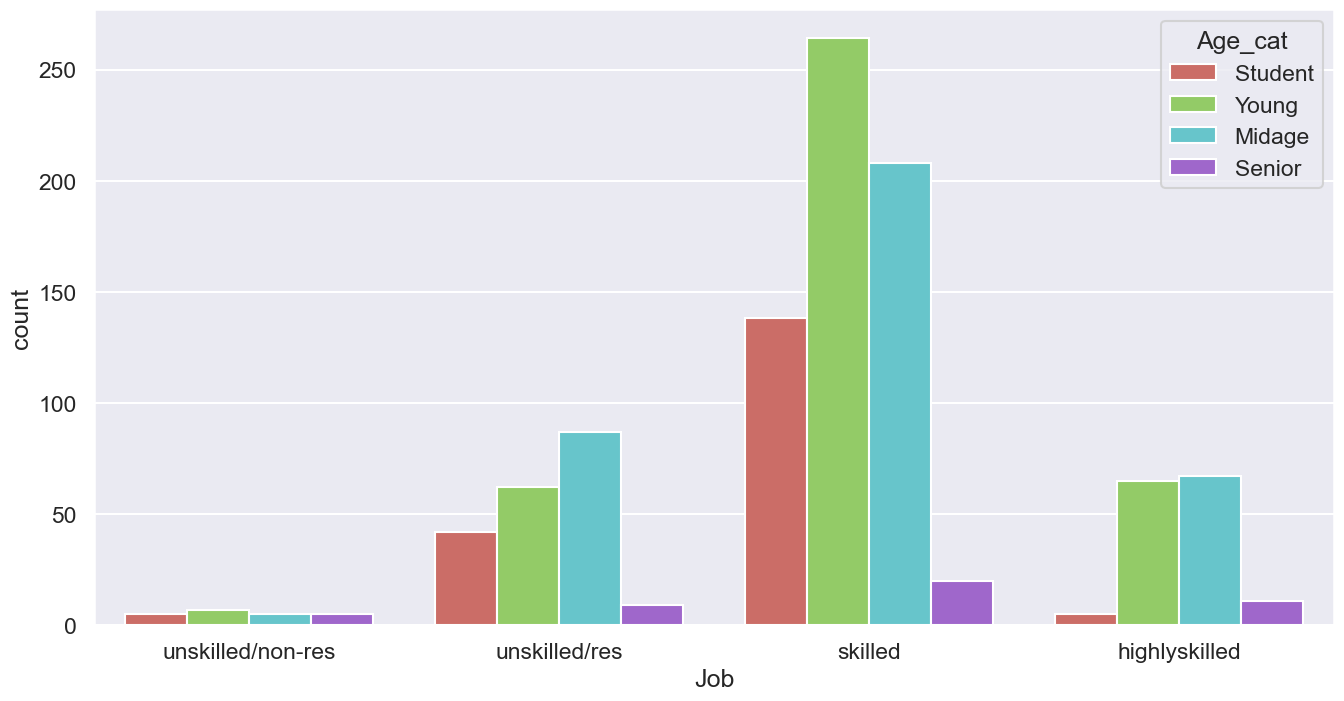

In [47]:
# Break down to see the age distributions of different job groups
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Age_cat', palette="hls", 
              order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'],
              )
plt.show()


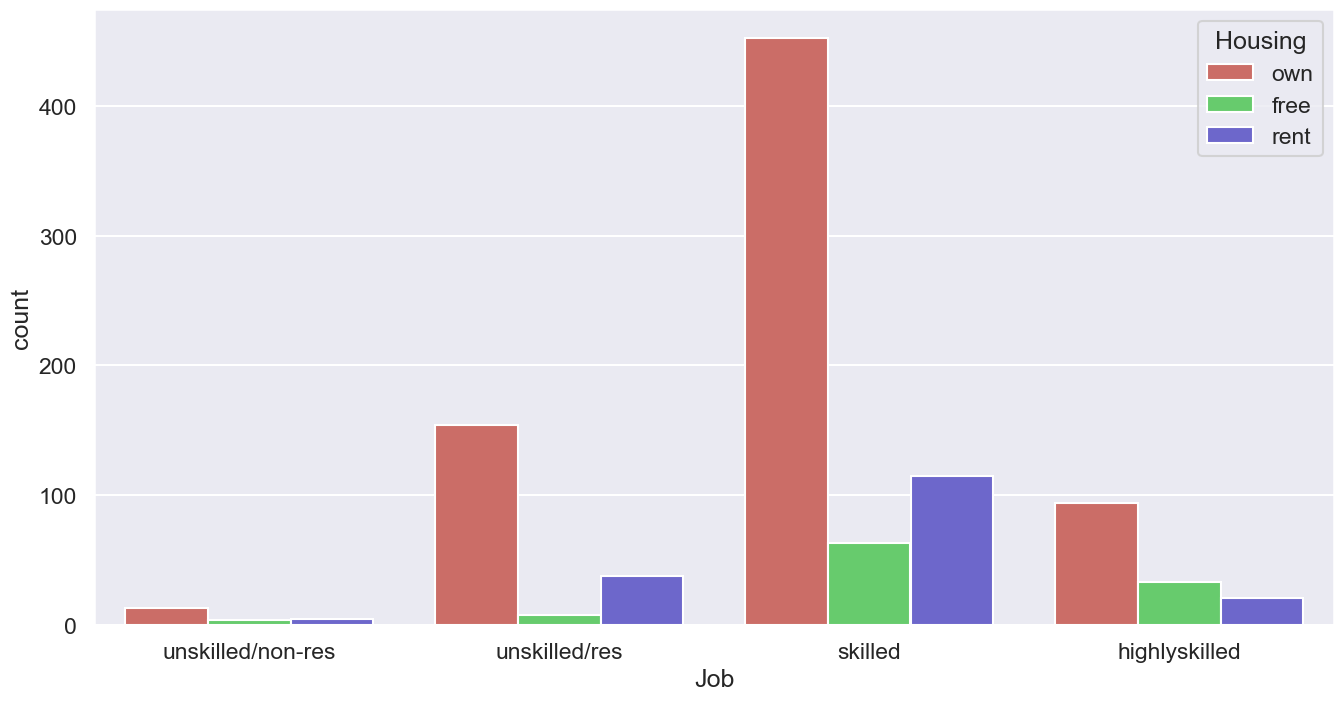

In [48]:
# plot the housing status of different job groups
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Housing', palette="hls", 
              order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'],
              )
plt.show()

### SAVING ACCOUNT

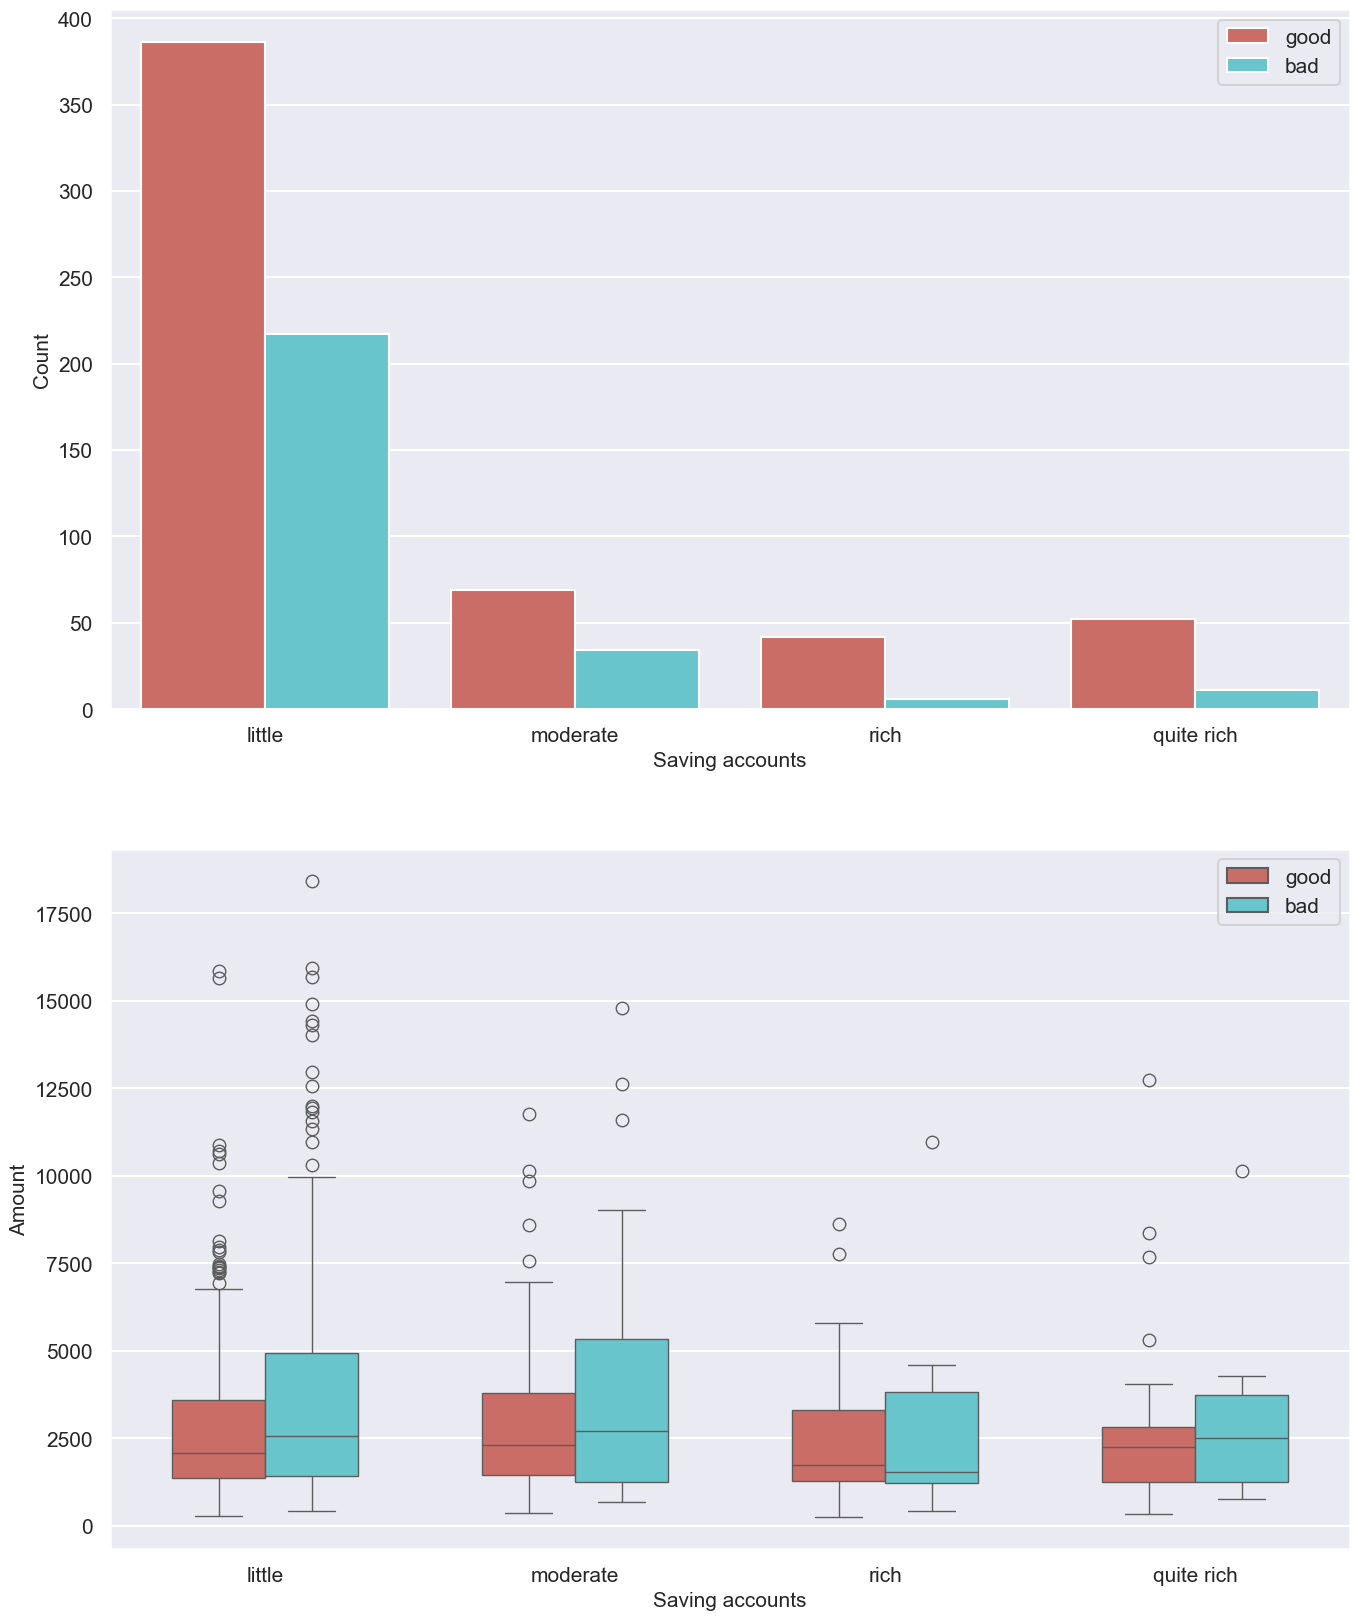

In [49]:
fig, axes = plt.subplots(2,1,  figsize=(16,20))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Saving accounts', hue = 'Risk', palette="hls",
                   order=['little','moderate','rich','quite rich'])
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Saving accounts', y = 'Credit amount', hue = 'Risk', 
                  palette="hls", width=0.6, order=['little','moderate','rich','quite rich'])

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Saving accounts', fontsize= 15)
ax2.set_xlabel('Saving accounts', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()

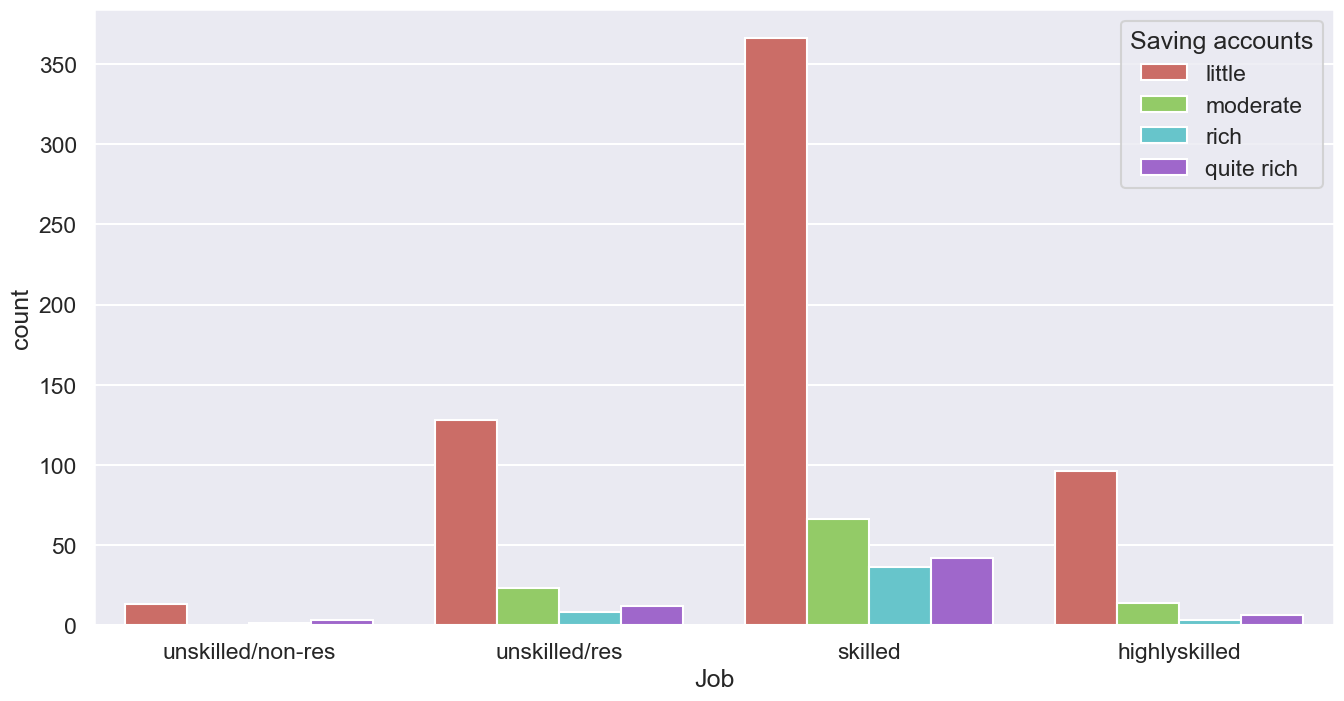

In [50]:
# Plot to check out the relationship between account status and job groups
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Saving accounts', palette="hls", 
              order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'],
              hue_order=['little','moderate','rich','quite rich'])
plt.show()


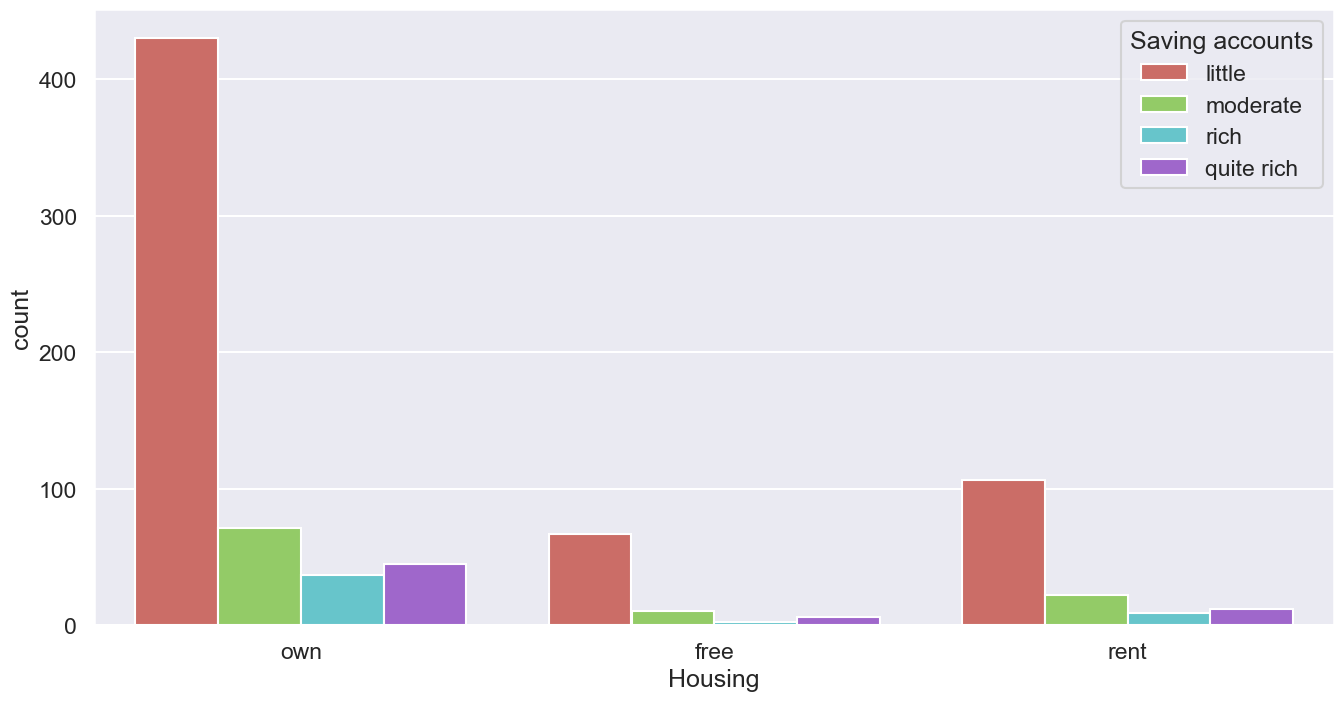

In [51]:
# plot the distribution of account status to housing status
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Housing', hue = 'Saving accounts', palette="hls",
              hue_order=['little','moderate','rich','quite rich']
              )
plt.show()


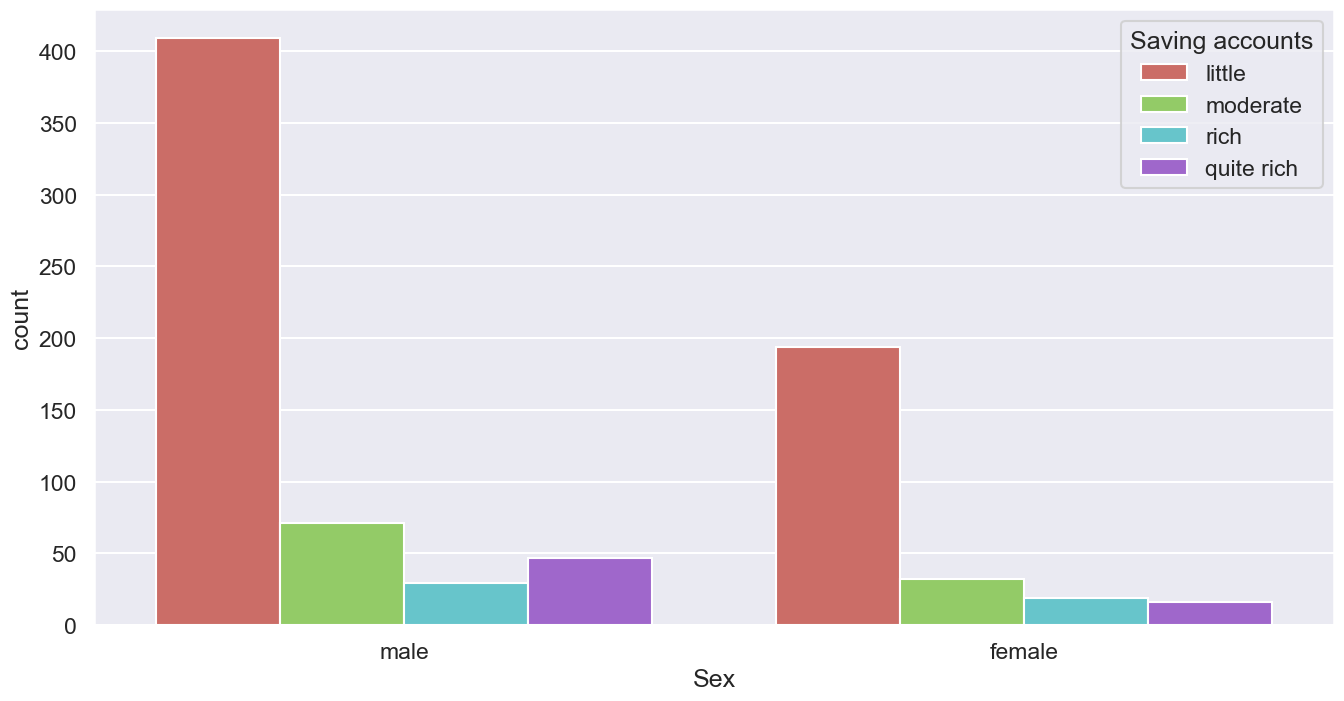

In [52]:
# relationship between account status and sex
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Sex', hue = 'Saving accounts', palette="hls",
              hue_order=['little','moderate','rich','quite rich']
              )
plt.show()

### CHECKING ACCOUNT

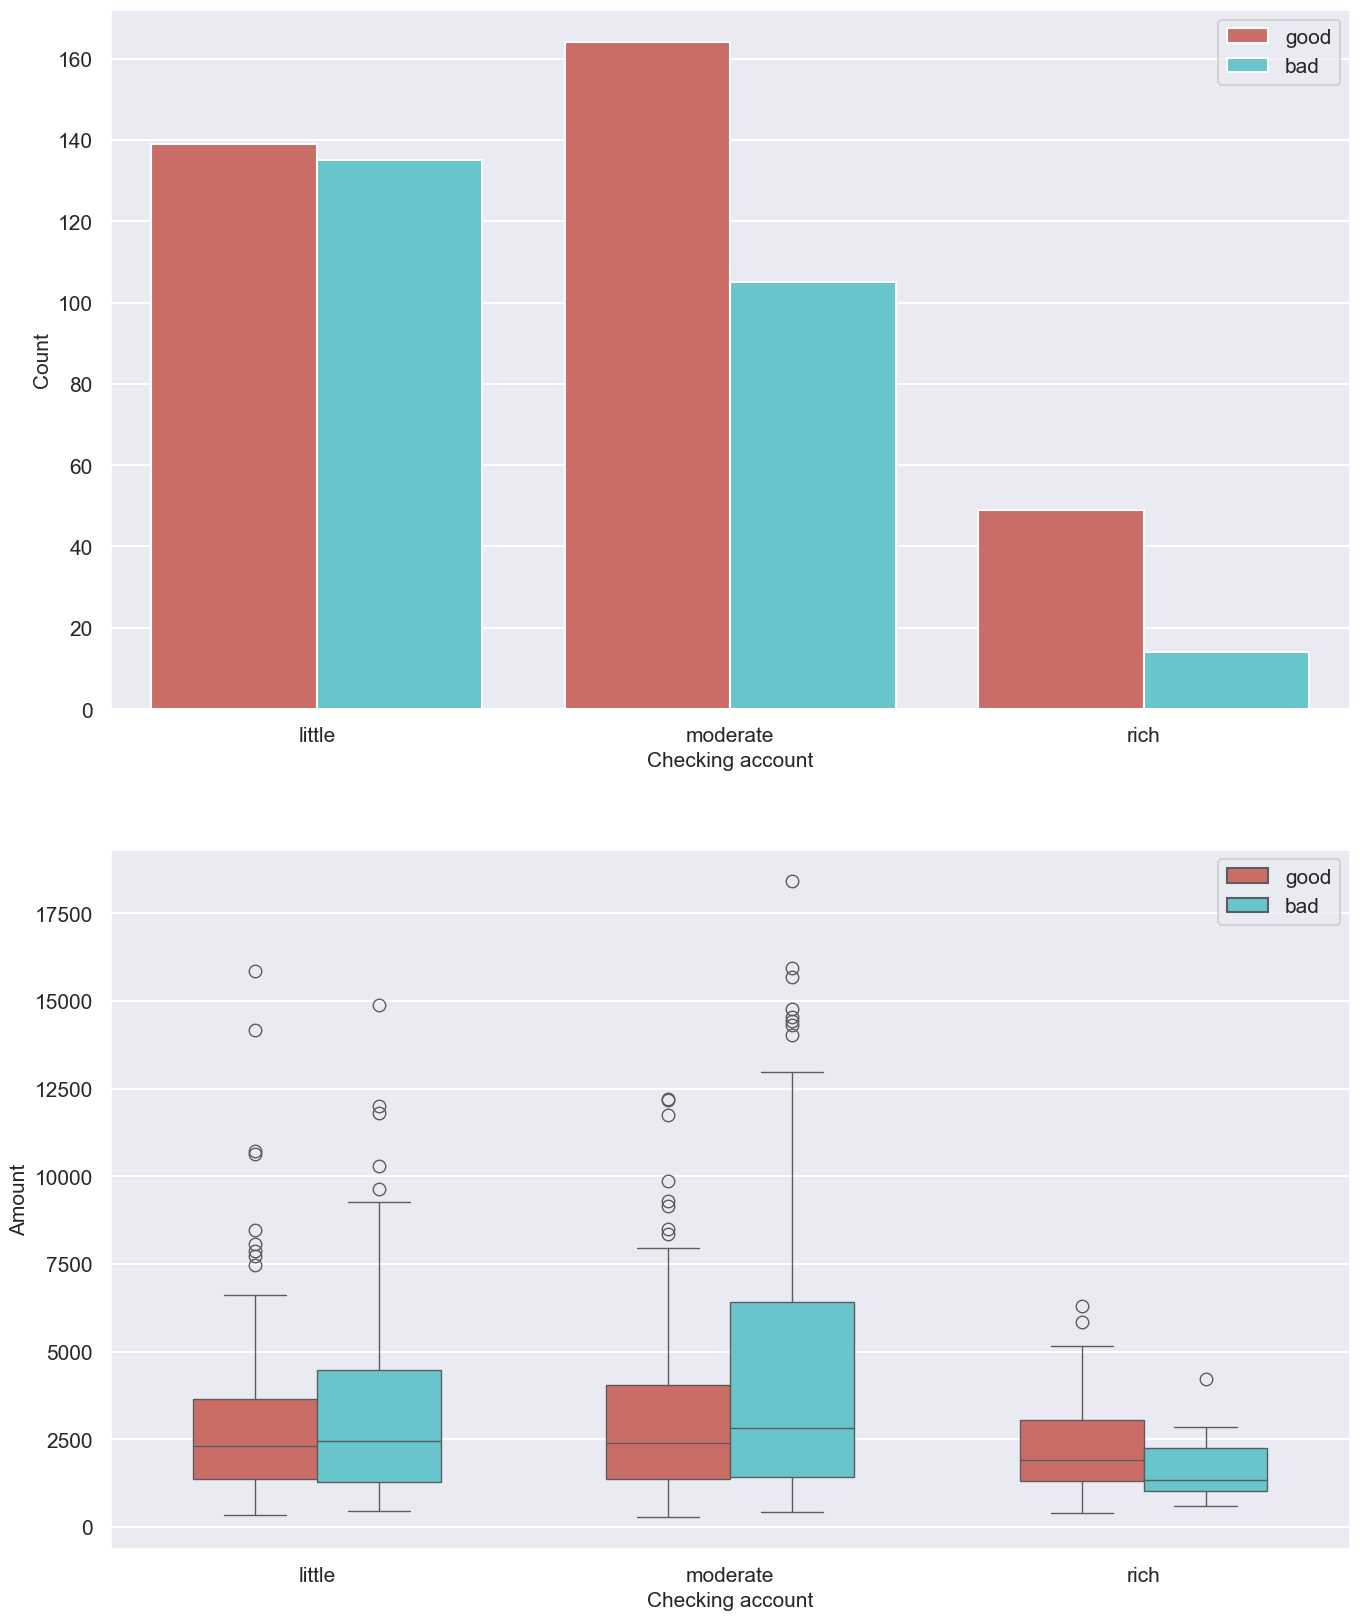

In [54]:
fig, axes = plt.subplots(2,1, figsize=(16,20))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Checking account', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Checking account', y = 'Credit amount', hue = 'Risk', 
                  palette="hls", width=0.6)

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Checking account', fontsize= 15)
ax2.set_xlabel('Checking account', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=15)
ax2.tick_params(axis = 'x',labelsize=15)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()


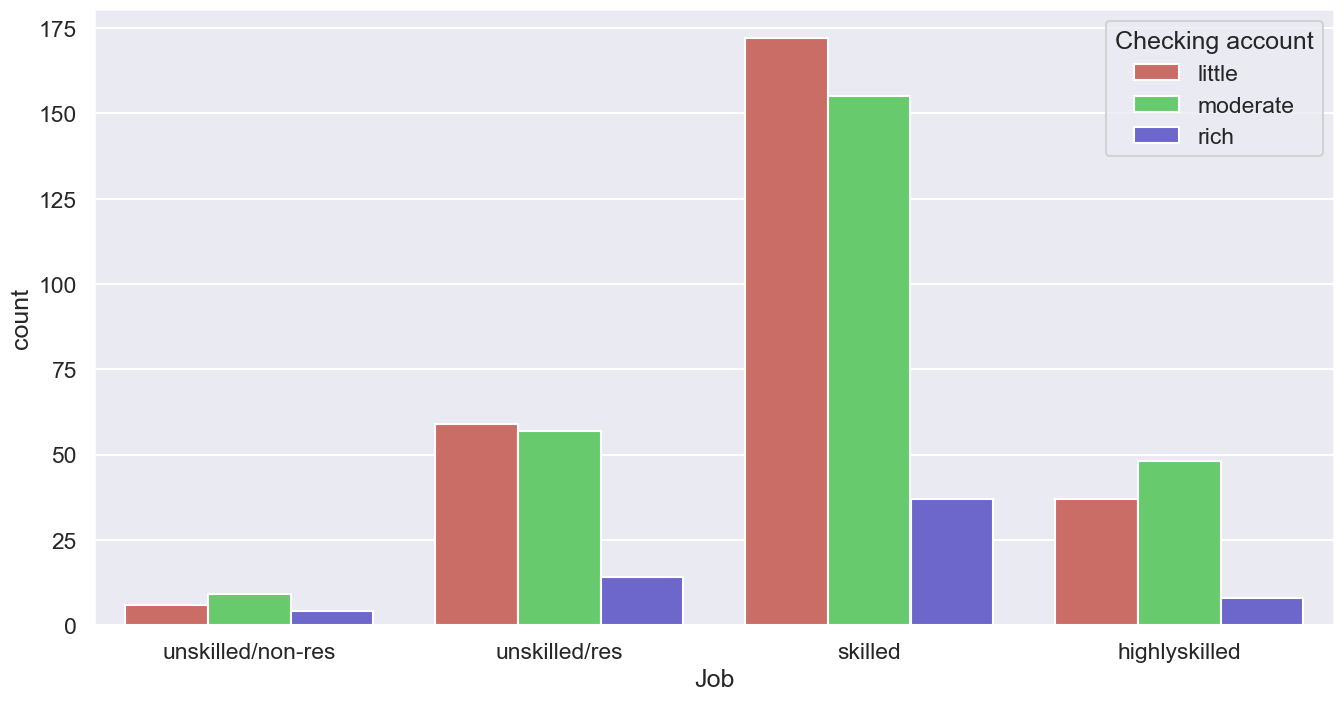

In [55]:
# Plot the distribution of checking account status of different job groups
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Checking account', palette="hls", 
              order=['unskilled/non-res','unskilled/res','skilled','highlyskilled'],
              hue_order=['little','moderate','rich'])
plt.show()

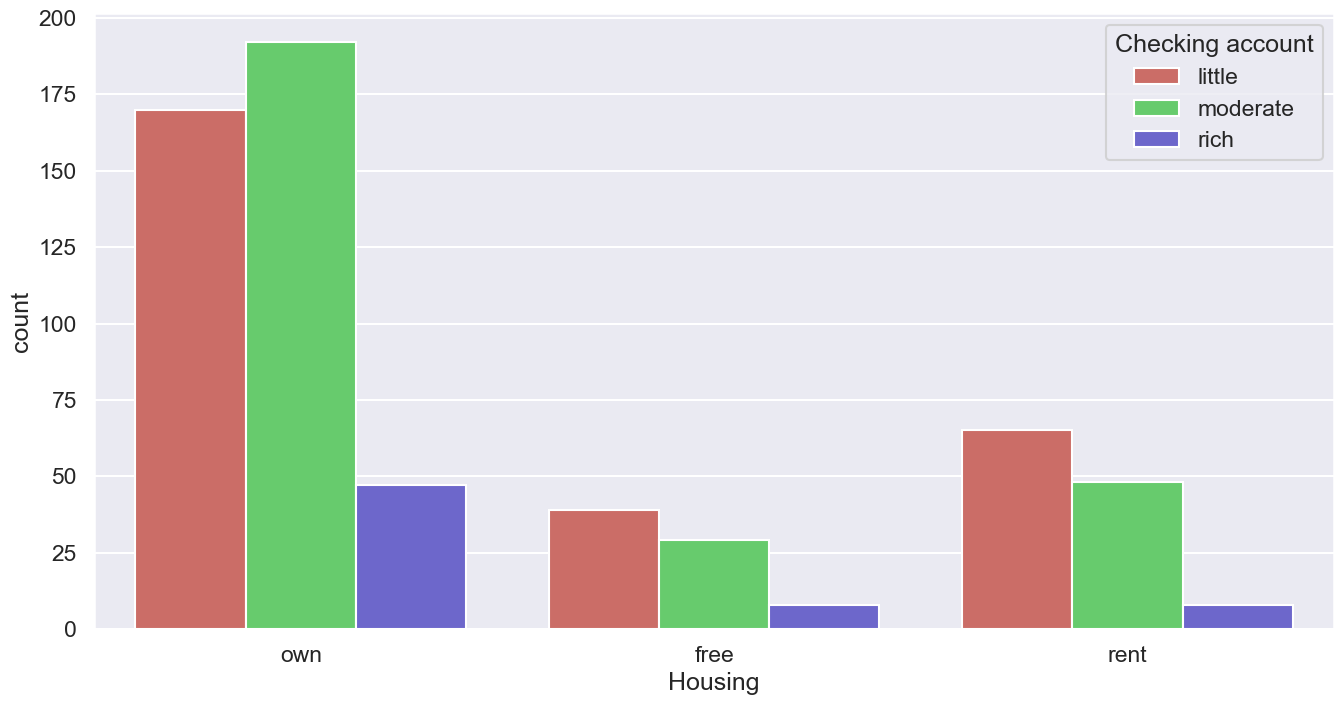

In [56]:
# Checking account status to housing status
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Housing', hue = 'Checking account', palette="hls",
              hue_order=['little','moderate','rich']
              )
plt.show()

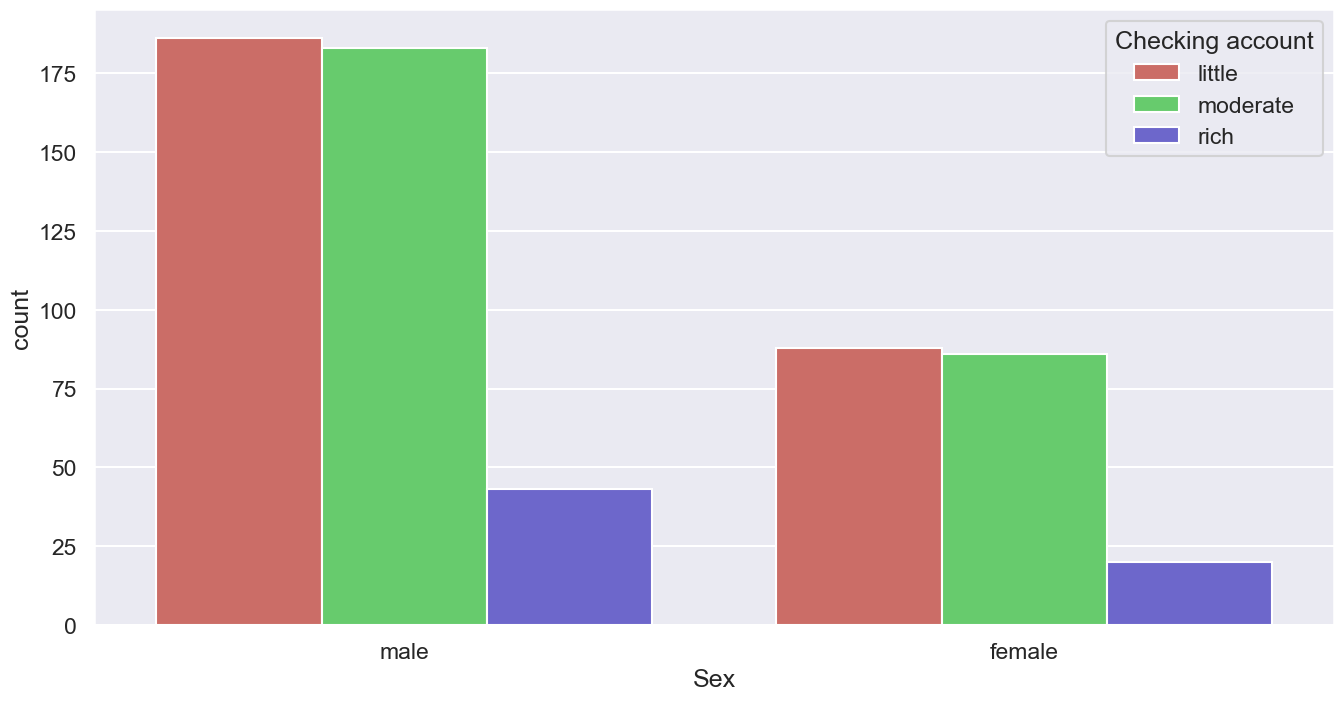

In [57]:
# checking account status to sex
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Sex', hue = 'Checking account', palette="hls",
              hue_order=['little','moderate','rich']
              )
plt.show()

### PURPOSE

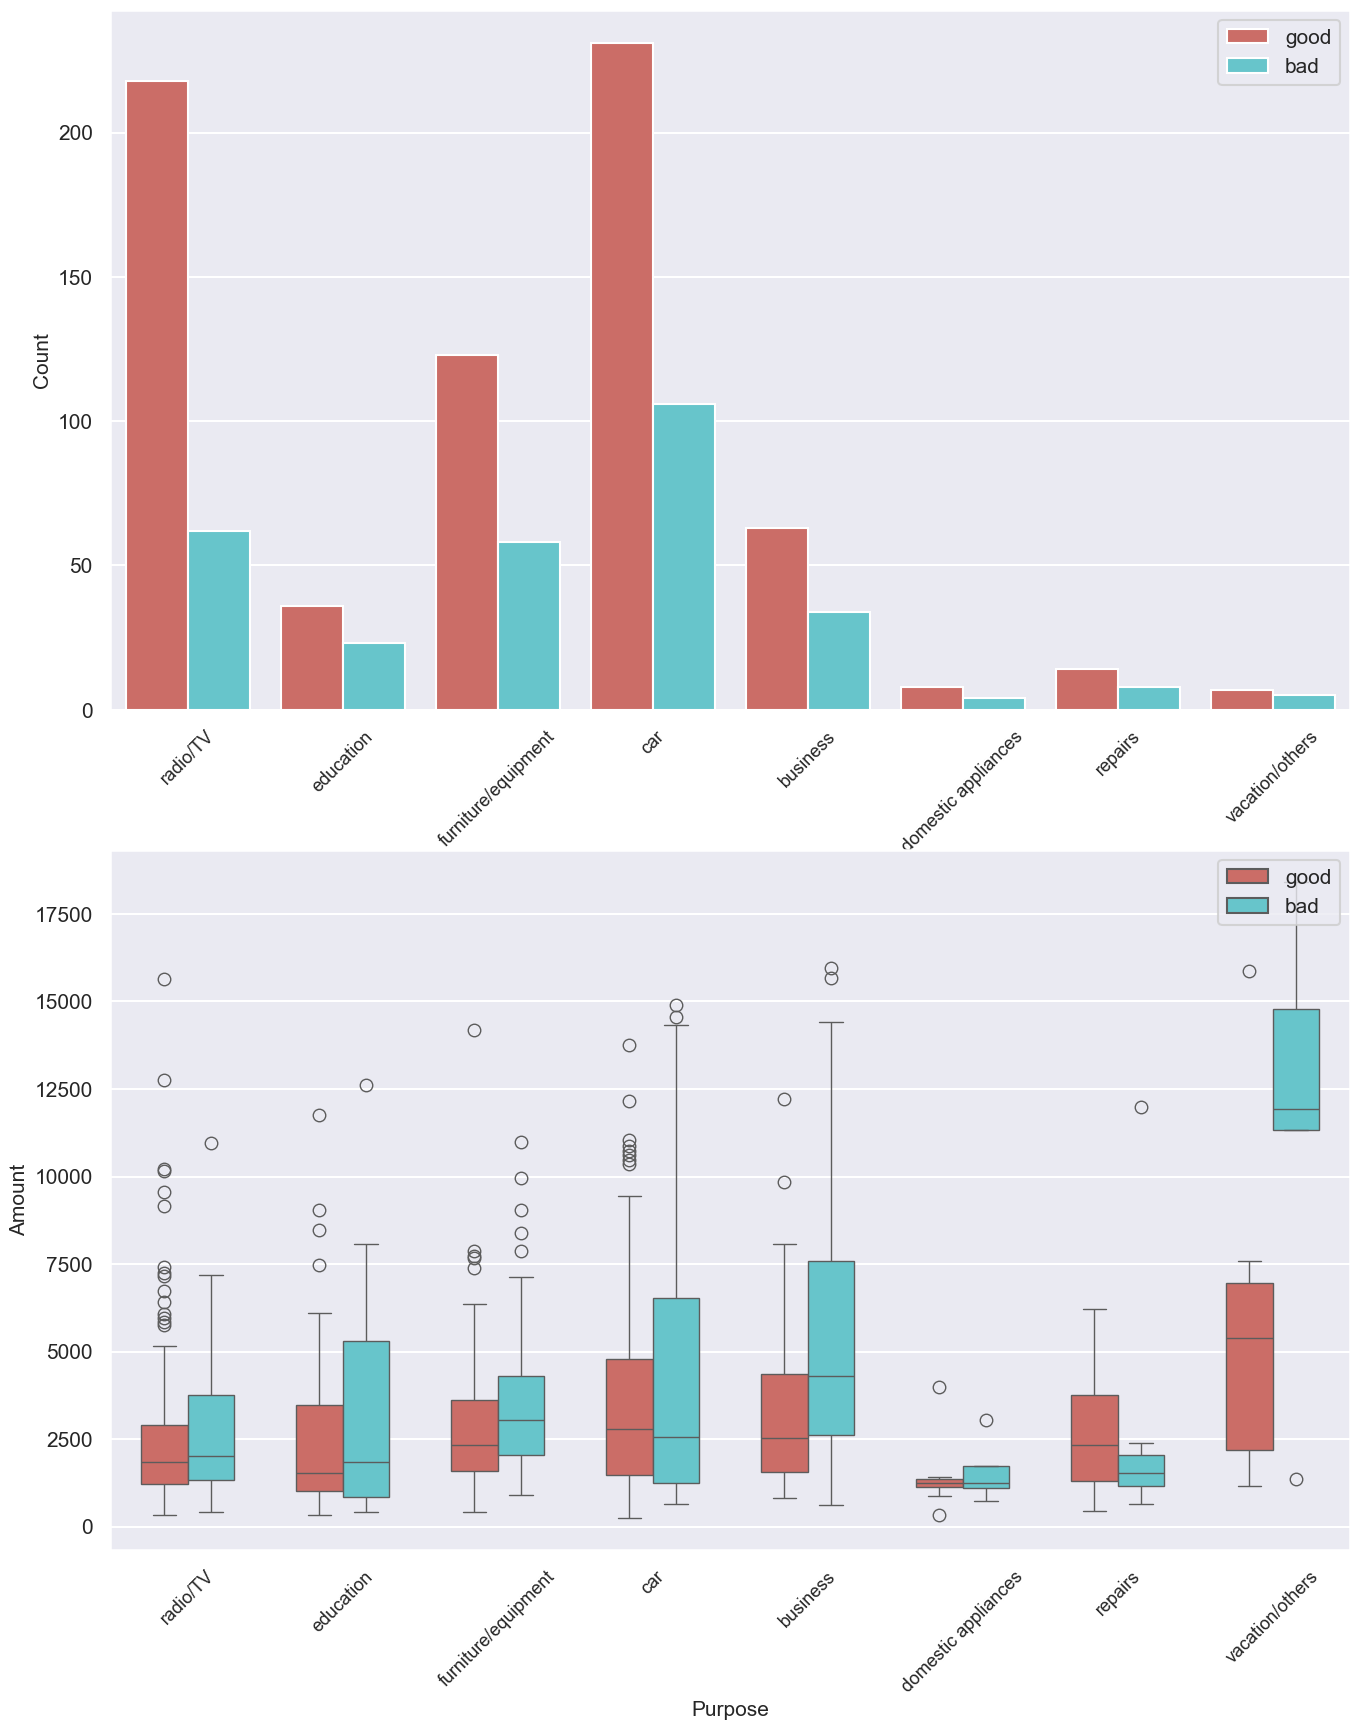

In [58]:
fig, axes = plt.subplots(2,1,  figsize=(16,20))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Purpose', hue = 'Risk', palette="hls")
ax2 = sns.boxplot(ax = axes[1], data = df_credit, x = 'Purpose', y = 'Credit amount', hue = 'Risk', palette="hls", width=0.6)

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Purpose', fontsize= 15)
ax2.set_xlabel('Purpose', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=13, rotation=45)
ax2.tick_params(axis = 'x',labelsize=13, rotation=45)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()

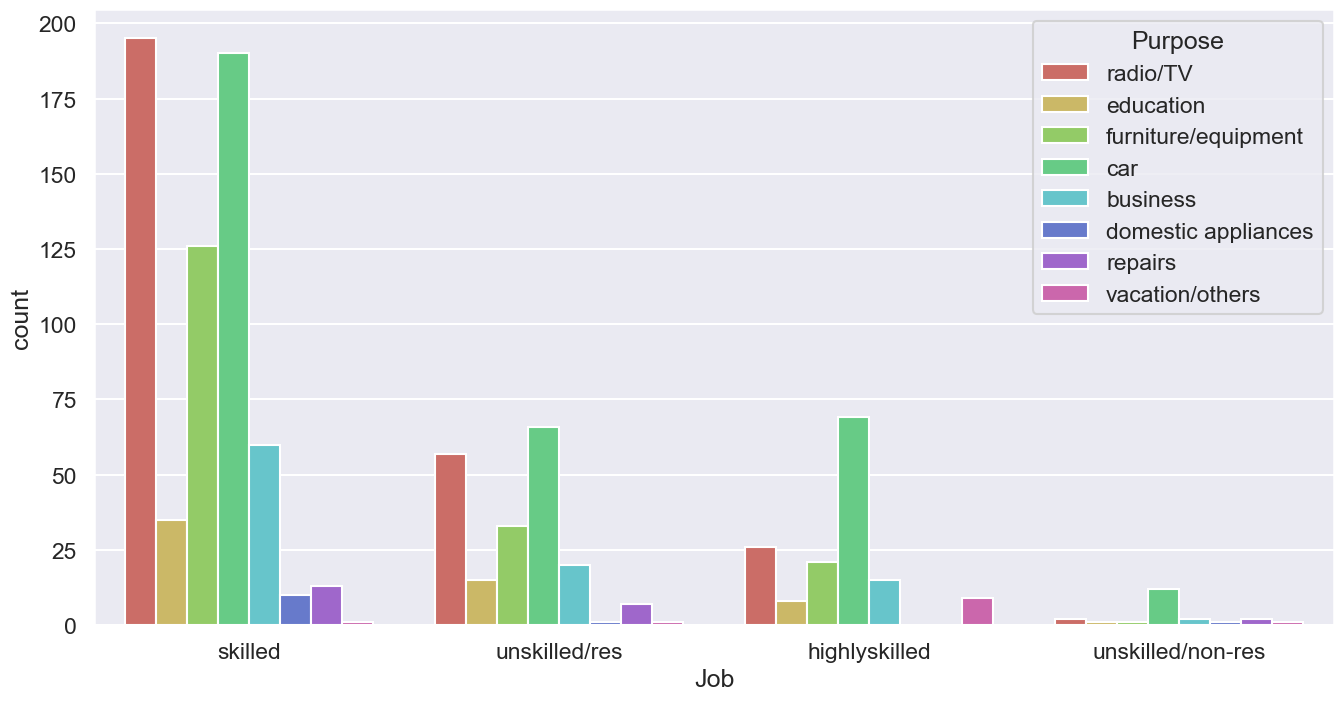

In [59]:
# Check out the distribution of different purposes by job groups
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Job', hue = 'Purpose', palette="hls")
plt.show()

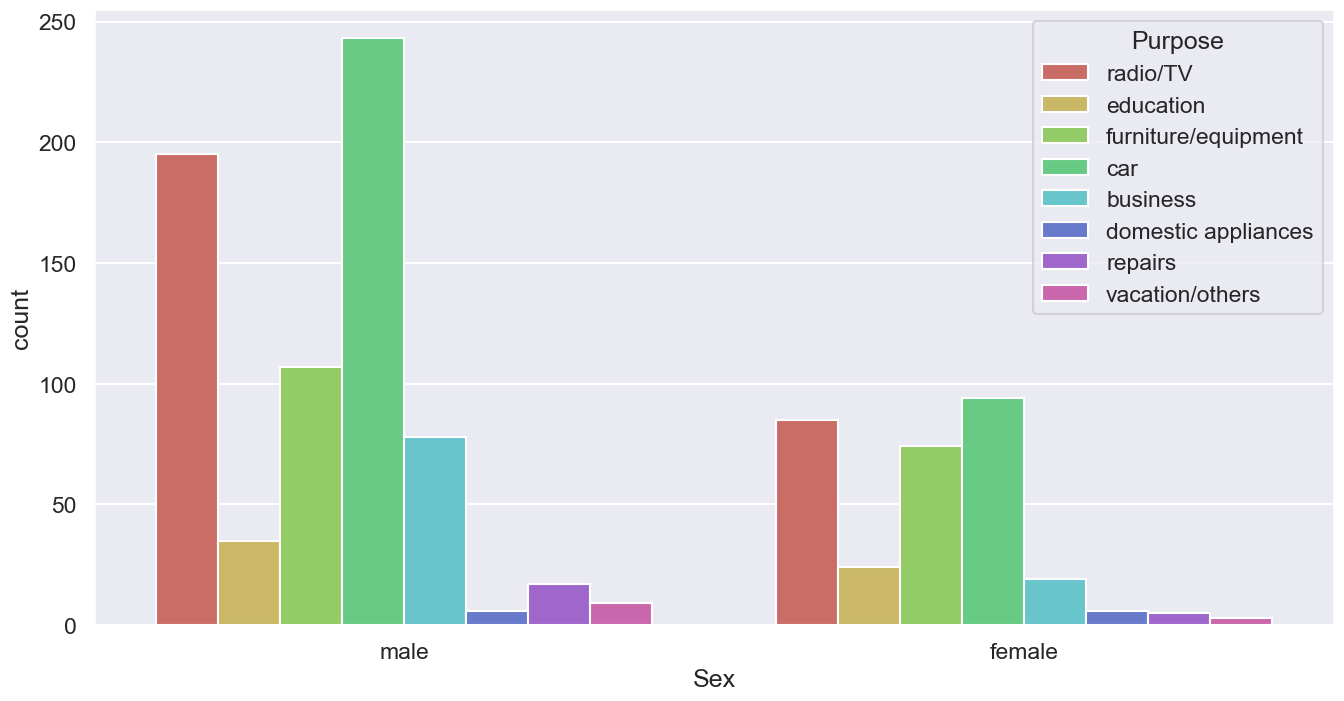

In [60]:
# purposes by sex
plt.figure(figsize = (16,8))
sns.countplot(data = df_credit, x = 'Sex', hue = 'Purpose', palette="hls")
plt.show()

### DURATION

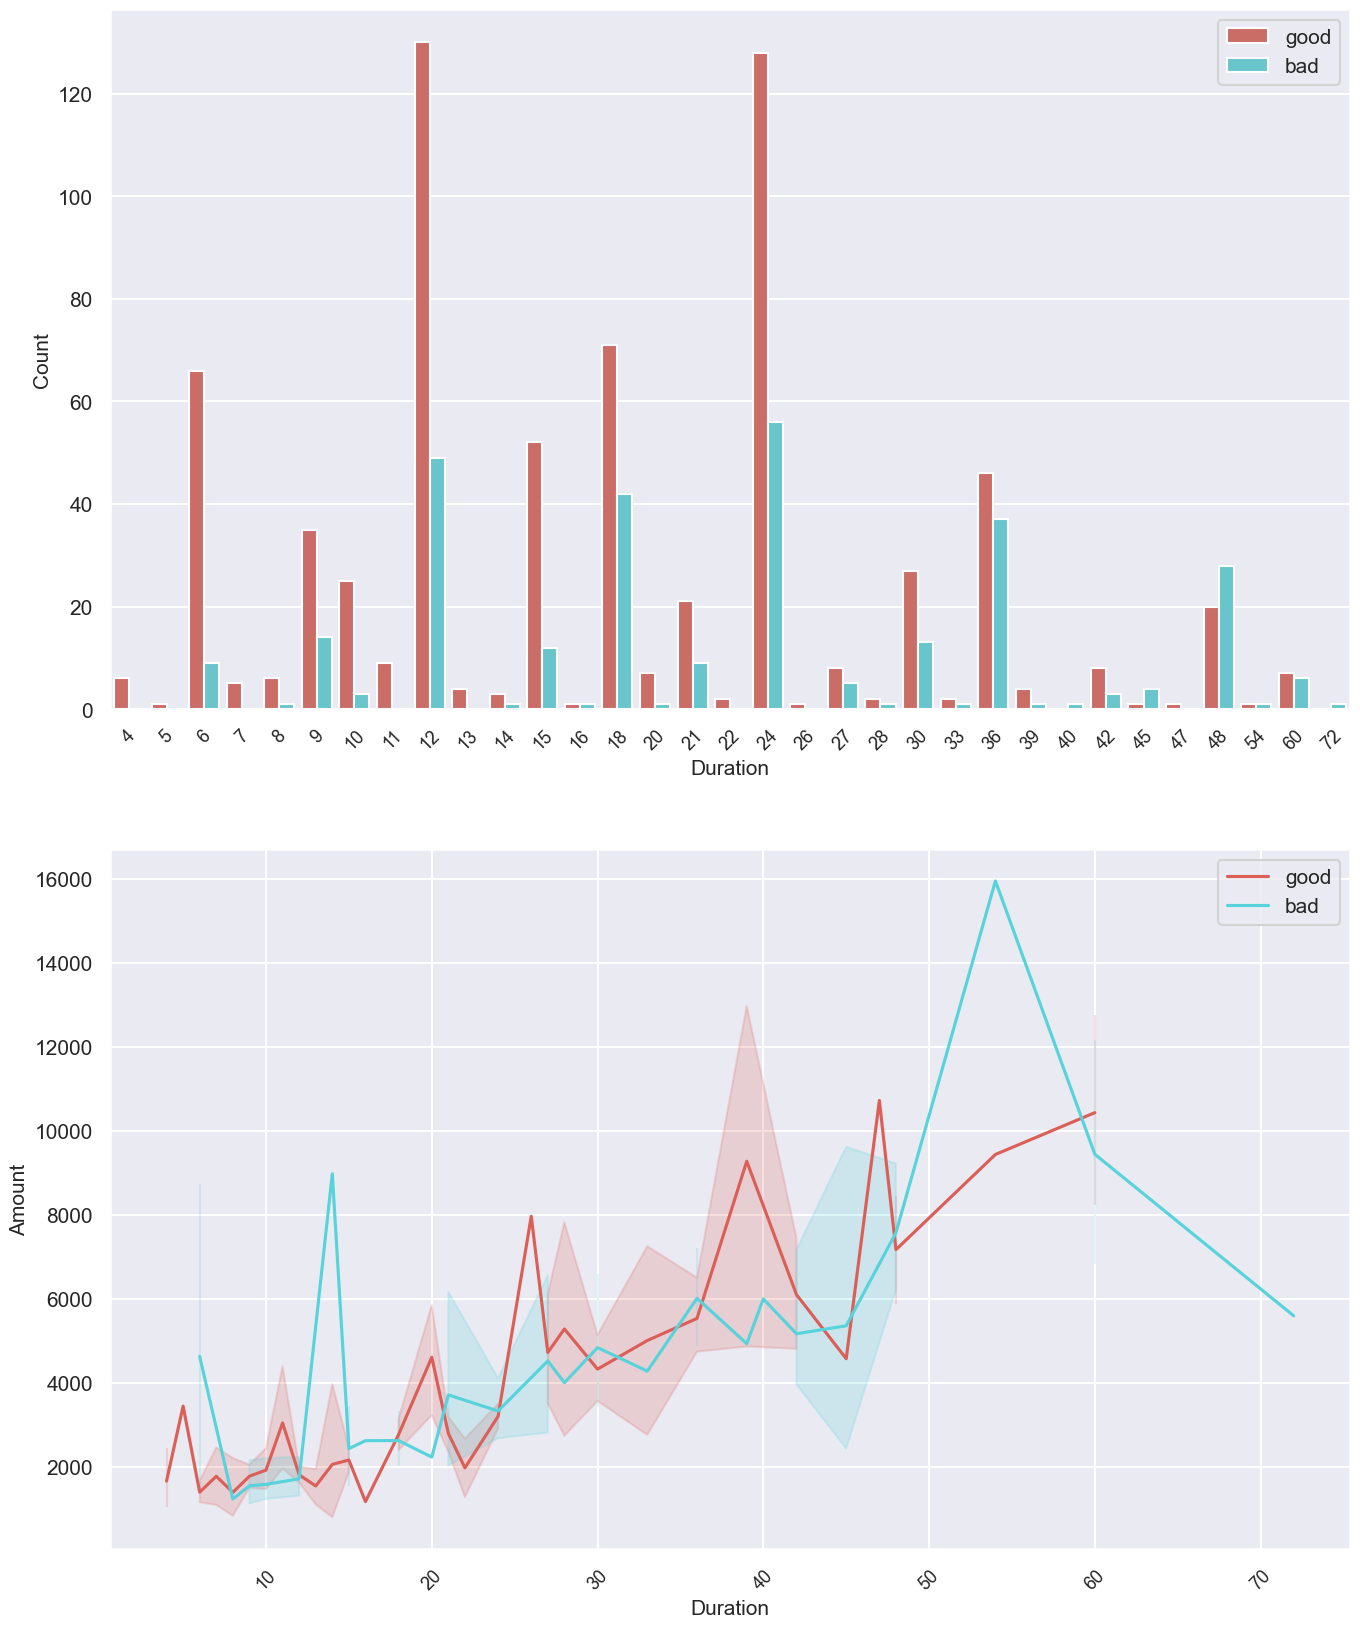

In [61]:
fig, axes = plt.subplots(2,1,  figsize=(16,20))

ax1 = sns.countplot(ax = axes[0], data = df_credit, x = 'Duration', hue = 'Risk', palette="hls")
ax2 = sns.lineplot(ax = axes[1], data = df_credit, x = 'Duration', y = 'Credit amount', hue = 'Risk', palette="hls")

ax1.set_ylabel('Count', fontsize= 15)
ax2.set_ylabel('Amount', fontsize= 15)
ax1.set_xlabel('Duration', fontsize= 15)
ax2.set_xlabel('Duration', fontsize= 15)
ax1.tick_params(axis = 'x',labelsize=13, rotation=45)
ax2.tick_params(axis = 'x',labelsize=13, rotation=45)
ax1.tick_params(axis = 'y',labelsize=15)
ax2.tick_params(axis = 'y',labelsize=15)
ax1.legend(loc=1, fontsize = 15)
ax2.legend(loc=1, fontsize = 15)
plt.show()